In [1]:
import numpy as np
import matplotlib.pyplot as pp
import seaborn
import json
import urllib.request
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
urllib.request.urlretrieve('https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USD&aggregate=1&allData=true','BTC_USD_HIST_DAYWISE.json')
urllib.request.urlretrieve('https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USD&aggregate=1&allData=true','ETH_USD_HIST_DAYWISE.json')

('ETH_USD_HIST_DAYWISE.json', <http.client.HTTPMessage at 0x29886d4a550>)

In [4]:
eth_DF = pd.io.json.json_normalize(json.load(open('ETH_USD_HIST_DAYWISE.json','r')),record_path='Data')
btc_DF = pd.io.json.json_normalize(json.load(open('BTC_USD_HIST_DAYWISE.json','r')),record_path='Data')

In [5]:
eth_DF.head()

,close,high,low,open,time,volumefrom,volumeto
0,3.00,3.0,0.6747,0.6747,1438905600,123.93,371.79
1,1.20,3.0,0.1500,3.0000,1438992000,2119.43,1438.16
2,1.20,1.2,1.2000,1.2000,1439078400,0.00,0.00
3,1.20,1.2,1.2000,1.2000,1439164800,0.00,0.00
4,0.99,1.2,0.6504,1.2000,1439251200,9486.09,7419.73


In [6]:
btc_DF.head()

,close,high,low,open,time,volumefrom,volumeto
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600


In [7]:
btc_DF['time'] = pd.to_datetime(btc_DF['time'],unit='s')
eth_DF['time'] = pd.to_datetime(eth_DF['time'],unit='s')

In [11]:
eth_DF.tail()    

,close,high,low,open,time,volumefrom,volumeto
957,559.91,590.20,545.48,557.57,2018-03-21,488509.24,2.777140e+08
958,539.89,578.01,516.22,559.91,2018-03-22,431953.84,2.339859e+08
959,543.83,543.84,506.79,539.89,2018-03-23,432407.55,2.252001e+08
960,520.16,546.01,519.51,543.84,2018-03-24,241529.67,1.293504e+08
961,519.09,522.88,516.94,520.17,2018-03-25,16655.61,8.658201e+06


In [12]:
btc_DF.tail()

,close,high,low,open,time,volumefrom,volumeto
2804,8911.35,9184.51,8778.69,8920.53,2018-03-21,109985.22,9.913764e+08
2805,8724.98,9107.00,8500.88,8911.37,2018-03-22,116522.98,1.023287e+09
2806,8934.80,8935.88,8307.58,8724.98,2018-03-23,109649.39,9.399973e+08
2807,8548.06,9036.23,8515.53,8935.51,2018-03-24,93296.24,8.276632e+08
2808,8556.31,8598.82,8505.39,8548.39,2018-03-25,6433.53,5.518213e+07


In [57]:
is_timeFrameBTC = ((btc_DF.time >= '2017-01-01') & (btc_DF.time <= '2017-12-31'))
is_timeFrameETH = ((eth_DF.time >= '2017-01-01') & (eth_DF.time <= '2017-12-31'))

currencies = ['BitCoin', 'Ethereum']

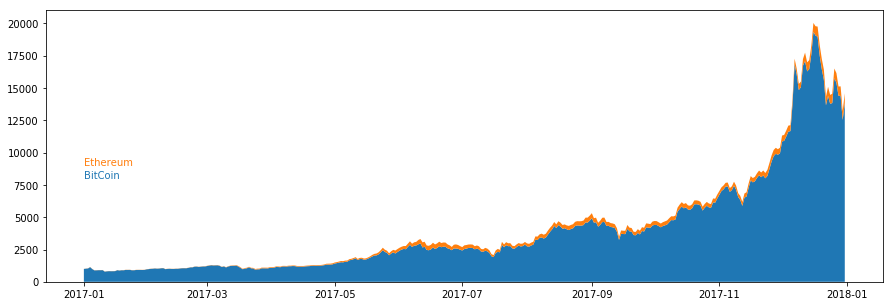

In [69]:
palette = seaborn.color_palette()
pp.figure(figsize=(15,5))
pp.stackplot(btc_DF[is_timeFrameBTC]['time'].tolist(),
             btc_DF[is_timeFrameBTC]['close'].tolist(),
             eth_DF[is_timeFrameETH]['close'].tolist())

for i,name in enumerate(currencies):
    pp.text('2017-01', 8000 + 1000*i, name, color=palette[i])
